<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score, f1_score
import warnings
warnings.filterwarnings("ignore")

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [ ]:
local_file_csv_2 = r"csv_files/dataset_part_2.csv"
df = pd.read_csv(local_file_csv_2)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,target
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
local_file_csv_3 = r"dataset_part_3.csv"
X = pd.read_csv(local_file_csv_3).values
X[:2]

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
     

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [5]:
y = pd.Series(df['target'].to_numpy())
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [6]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X=X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [8]:
y_test.shape[0]

18

In [9]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## TASK  4


Create a logistic regression object using then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
param_grid = {
    'penalty': ['elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-3, 1e-4, 1e-5],
    'l1_ratio': [0, 0.5, 1],
}
lr = LogisticRegression(verbose=0)
lr_gscv = GridSearchCV(
    lr,
    param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=4,
    verbose=0
)
lr_gscv.fit(X_train, y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [11]:
print("Tuned Hyperparameters (Best Parameters):")
for param, value in lr_gscv.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Accuracy: {lr_gscv.best_score_:.4f}")

Tuned Hyperparameters (Best Parameters):
  C: 1
  class_weight: None
  fit_intercept: True
  l1_ratio: 1
  max_iter: 1000
  penalty: elasticnet
  solver: saga
  tol: 0.0001

Best Accuracy: 0.8089


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [12]:
lr_accuracy = lr_gscv.score(X_test, y_test)
lr_accuracy

0.9444444444444444

Lets look at the confusion matrix:


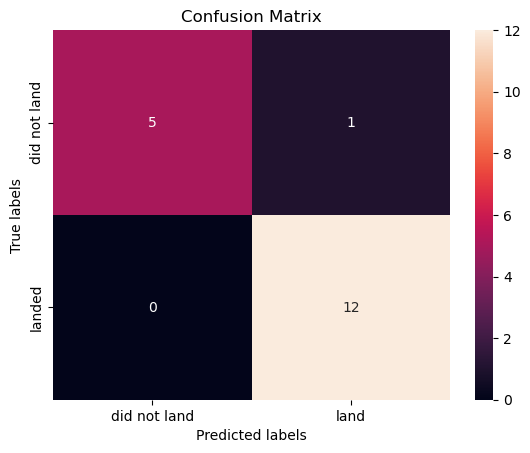

In [13]:
lr_yhat = lr_gscv.predict(X_test)
plot_confusion_matrix(y_test, lr_yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': np.logspace(-4, 4, 10),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 4, 10)),
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'class_weight': [None, 'balanced']
}
svm = SVC()
svm_gscv = GridSearchCV(svm, param_grid, cv=cv)
svm_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'class_weight': [None, 'balanced'],
                         'coef0': [0.0, 0.1, 0.5, 1.0], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.0001,
                                   0.000774263682681127, 0.005994842503189409,
                                   0.046415888336127774, 0.3593813663804626,
                                   2.782559402207126, 21.54434690031882,
                                   166.81005372000558, 1291.5496650148827,
                                   10000.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [15]:
print("Tuned Hyperparameters (Best Parameters):")
for param, value in svm_gscv.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Accuracy: {svm_gscv.best_score_:.4f}")

Tuned Hyperparameters (Best Parameters):
  C: 166.81005372000558
  class_weight: None
  coef0: 0.0
  degree: 2
  gamma: 166.81005372000558
  kernel: sigmoid

Best Accuracy: 0.8518


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
svm_accuracy = svm_gscv.score(X_test, y_test)
svm_accuracy

0.6666666666666666

We can plot the confusion matrix


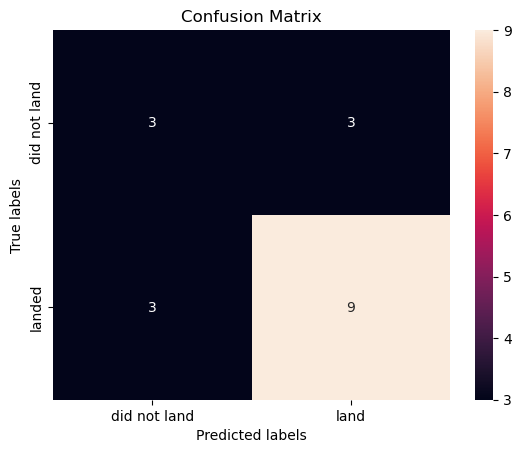

In [17]:
svm_yhat = svm_gscv.predict(X_test)
plot_confusion_matrix(y_test, svm_yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + [n for n in range(3, 30, 3)],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': np.linspace(0, 0.1, 10)
}

dtc = DecisionTreeClassifier()
dtc_gscv = GridSearchCV(dtc, param_grid, cv=cv)
dtc_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 6, 9, 12, 15, 18, 21, 24, 27],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']})

In [19]:
print("Tuned Hyperparameters (Best Parameters):")
for param, value in dtc_gscv.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Accuracy: {dtc_gscv.best_score_:.4f}")

Tuned Hyperparameters (Best Parameters):
  ccp_alpha: 0.011111111111111112
  class_weight: None
  criterion: log_loss
  max_depth: 27
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 10
  splitter: random

Best Accuracy: 0.8339


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [20]:
dtc_accuracy = dtc_gscv.score(X_test, y_test)
dtc_accuracy

0.6666666666666666

We can plot the confusion matrix


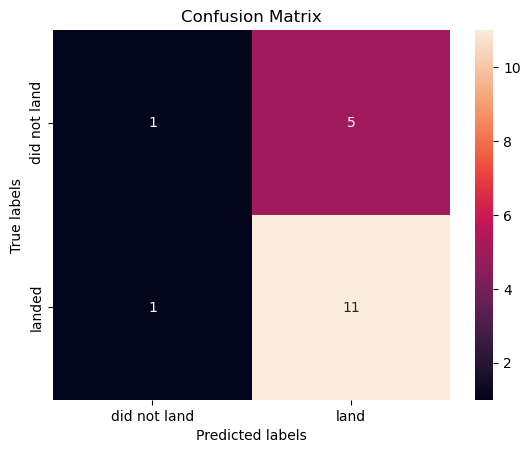

In [21]:
dtc_yhat = dtc_gscv.predict(X_test)
plot_confusion_matrix(y_test, dtc_yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
param_grid = {
    'n_neighbors': list(range(1, 21, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3],
    'leaf_size': [10, 20, 30, 40, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=cv)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [23]:
print("Tuned Hyperparameters (Best Parameters):")
for param, value in knn_gscv.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Accuracy: {knn_gscv.best_score_:.4f}")

Tuned Hyperparameters (Best Parameters):
  algorithm: auto
  leaf_size: 10
  metric: chebyshev
  n_neighbors: 7
  p: 1
  weights: uniform

Best Accuracy: 0.7750


## TASK  11


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [24]:
knn_accuracy = knn_gscv.score(X_test, y_test)
knn_accuracy

0.7222222222222222

We can plot the confusion matrix


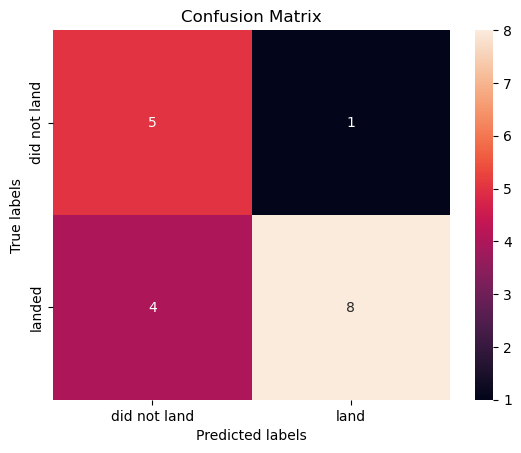

In [25]:
knn_yhat = knn_gscv.predict(X_test)
plot_confusion_matrix(y_test, knn_yhat)

## TASK  12


Find the method performs best:


In [26]:
metrics = {
    'Model': ['LogReg', 'SVM', 'Tree', 'KNN'],
    'Jaccard_Score': [
        jaccard_score(y_test, lr_yhat, average='binary'),
        jaccard_score(y_test, svm_yhat, average='binary'),
        jaccard_score(y_test, dtc_yhat, average='binary'),
        jaccard_score(y_test, knn_yhat, average='binary')
    ],
    'F1_Score': [
        f1_score(y_test, lr_yhat, average='binary'),
        f1_score(y_test, svm_yhat, average='binary'),
        f1_score(y_test, dtc_yhat, average='binary'),
        f1_score(y_test, knn_yhat, average='binary')
    ],
    'Accuracy': [
        lr_accuracy, svm_accuracy, dtc_accuracy, knn_accuracy
    ]
}
scores_df = pd.DataFrame(metrics)
scores_df = scores_df.set_index('Model')
print(scores_df)

        Jaccard_Score  F1_Score  Accuracy
Model                                    
LogReg       0.923077  0.960000  0.944444
SVM          0.600000  0.750000  0.666667
Tree         0.647059  0.785714  0.666667
KNN          0.615385  0.761905  0.722222


In [27]:
metrics = {
    'Model': ['LogReg', 'SVM', 'Tree', 'KNN'],
    'Jaccard_Score': [
        jaccard_score(y, lr_gscv.predict(X), average='binary'),
        jaccard_score(y, svm_gscv.predict(X), average='binary'),
        jaccard_score(y, dtc_gscv.predict(X), average='binary'),
        jaccard_score(y, knn_gscv.predict(X), average='binary')
    ],
    'F1_Score': [
        f1_score(y, lr_gscv.predict(X), average='binary'),
        f1_score(y, svm_gscv.predict(X), average='binary'),
        f1_score(y, dtc_gscv.predict(X), average='binary'),
        f1_score(y, knn_gscv.predict(X), average='binary')
    ],
    'Accuracy': [
        lr_gscv.score(X, y),
        svm_gscv.score(X, y),
        dtc_gscv.score(X, y),
        knn_gscv.score(X, y)
    ]
}
scores_df = pd.DataFrame(metrics)
scores_df = scores_df.set_index('Model')
print(scores_df)

        Jaccard_Score  F1_Score  Accuracy
Model                                    
LogReg       0.967742  0.983607  0.977778
SVM          0.647887  0.786325  0.722222
Tree         0.830986  0.907692  0.866667
KNN          0.835821  0.910569  0.877778


### Conclusion

- Based on the scores of the Test Set, we can not confirm which method perfoms best.
- Same Test Set scores may be due to the small test sample size (18 samples). Therefore, we tested all methods based on the whole Dataset.
- The scores of the whole Dataset confirm that the best model is the Decision Tree Model. This model has not only higher scores, but also the highest accuracy.

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
